### ДЗ Семинар 10.
### Дисперсионный анализ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import seaborn as sns

*Задача 1:   
Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов:    
Футболисты: 173, 175, 180, 178, 177, 185, 183, 182.    
Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180.    
Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.*

In [2]:
football_players = np.array([173, 175, 180, 178, 177, 185, 183, 182])
hockey_players = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
weigh_lifters = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

In [8]:
data = {'Рост спортсмена': [173, 175, 180, 178, 177, 185, 183, 182,
                            177, 179, 180, 188, 177, 172, 171, 184, 180, 
                            172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170],
        'Type': ['Футбол', 'Футбол', 'Футбол', 'Футбол', 'Футбол', 'Футбол', 'Футбол', 'Футбол',
                 'Хоккей', 'Хоккей', 'Хоккей', 'Хоккей', 'Хоккей', 'Хоккей', 'Хоккей', 'Хоккей', 'Хоккей',
                 'Штанга', 'Штанга', 'Штанга', 'Штанга', 'Штанга', 'Штанга', 'Штанга', 'Штанга', 'Штанга', 'Штанга', 'Штанга']}
  
df = pd.DataFrame(data=data)
df

,Рост спортсмена,Type
0,173,Футбол
1,175,Футбол
2,180,Футбол
3,178,Футбол
4,177,Футбол
5,185,Футбол
6,183,Футбол
7,182,Футбол
8,177,Хоккей
9,179,Хоккей


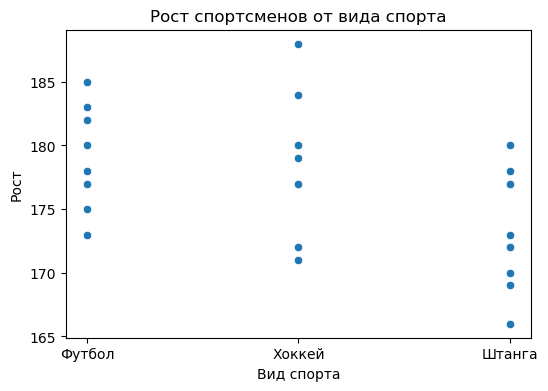

In [9]:
plt.figure(figsize=(6, 4))

sns.scatterplot(x=df['Type'], y=df['Рост спортсмена'])

plt.title('Рост спортсменов от вида спорта')
plt.xlabel('Вид спорта')
plt.ylabel('Рост');

Создадим общий массив данных, содержащий все данные из наших массивов

In [3]:
total = np.concatenate([football_players, hockey_players, weigh_lifters])
total

array([173, 175, 180, 178, 177, 185, 183, 182, 177, 179, 180, 188, 177,
       172, 171, 184, 180, 172, 173, 169, 177, 166, 180, 178, 177, 172,
       166, 170])

In [4]:
mean_total = np.mean(total)
mean_total

176.46428571428572

Сформулируем нулевую гипотезу:   
$H_0: \mu_1=\mu_2=\mu_3$ т.е. средний рост спортсмена не зависит от вида спорта, которым он занимается (из представленных трех).   
Альтернативная гипотеза:   
$H_1: \mu_1\not=\mu_2\not=\mu_3$ т.е. средний рост спортсмена зависит от выбранного им спорта.

Проверим выборки на нормальность с помощью теста Шапиро: 

In [5]:
stats.shapiro(football_players)

ShapiroResult(statistic=0.9775082468986511, pvalue=0.9495404362678528)

In [6]:
stats.shapiro(hockey_players)

ShapiroResult(statistic=0.9579196572303772, pvalue=0.7763139009475708)

In [7]:
stats.shapiro(weigh_lifters)

ShapiroResult(statistic=0.9386808276176453, pvalue=0.5051165223121643)

*Вывод: все выборки имеют нормальное распределение.*

Проверим количество данных в каждом массиве

In [8]:
len(football_players), len(hockey_players), len(weigh_lifters)

(8, 9, 11)

Проверим дисперсии в выборках: 

In [9]:
np.var(football_players), np.var(hockey_players), np.var(weigh_lifters)

(14.859375, 25.33333333333333, 20.925619834710744)

Проверим однородность дисперсий с помощию встроенного теста Барлетт

In [10]:
stats.bartlett(football_players, hockey_players, weigh_lifters)

BartlettResult(statistic=0.4640521043406442, pvalue=0.7929254656083131)

*Вывод: т.к. p-value > 0.05, дисперсии однородны*   
   
***Выборки имеют нормальное распределение, а также однородные дисперсии.    
Можем применить критерий Фишера для проведения дисперсионного однофакторного анализа***

Рассчитаем наблюдаемый критерий Фишера по формуле: 
     
$F_н = \frac{\sigma_{факт}^2}{\sigma_{ост}^2}$, где    
$\sigma_{факт}^2 = \frac{S_{факт}^2}{k-1}$ - факторная дисперсия, где    
$S_{факт}^2 = \sum_{i=1}^k(y_i-\bar y_i)^2 n_i $ - факторная сумма квадратных отклонений      
$k$ - количествово сравниваемых групп (в нашем случае k=3),    
$n_i$ - количество значений в группе  
   
$\sigma_{ост}^2 = \frac{S_{ост}^2}{n-k}$ - остаточная дисперсия, где   
$S_{ост}^2 = \sum_{i=1}^k \sum_{j=1}^{n_j}(y_{ij}-\bar y_i)^2 $ - остаточная сумма квадратных отклонений       
$n$ - общее количество сравниваемых значений

Найдем факторную сумму квадратных отклонений $S_{факт}^2$:

In [17]:
S_f = np.sum((np.mean(football_players) - np.mean(total)) ** 2) * len(football_players) + np.sum((np.mean(hockey_players) - np.mean(total)) ** 2) * len(hockey_players) + np.sum((np.mean(weigh_lifters) - np.mean(total)) ** 2) * len(weigh_lifters)
S_f

253.9074675324678

Найдем остаточную сумму квадратных отклонений $S_{ост}^2$

In [20]:
S_ost = np.sum((football_players - np.mean(football_players)) ** 2) + np.sum((hockey_players - np.mean(hockey_players)) ** 2) + np.sum((weigh_lifters - np.mean(weigh_lifters)) ** 2)
S_ost

577.0568181818182

Проверка корректности найденных S

In [21]:
print(S_f + S_ost)
np.sum((total - np.mean(total)) ** 2)

830.964285714286


830.9642857142854

Найдем фактическую и останочную дисперсии:    
$\sigma_{факт}^2 = \frac{S_{факт}^2}{k-1}$    
$\sigma_{ост}^2 = \frac{S_{ост}^2}{n-k}$

In [22]:
k = 3
n = len(total)
n

28

In [23]:
D_f = S_f/(k - 1)
D_f

126.9537337662339

In [24]:
D_ost = S_ost/(n - k)
D_ost

23.08227272727273

Найдем наблюдаемый коэффициент Фишера:   
$F_н = \frac{\sigma_{факт}^2}{\sigma_{ост}^2}$

In [25]:
F_n = D_f/D_ost
print(f'Рассчитанное значение коэффициента Фишера Fн={F_n:.4f}')

Рассчитанное значение коэффициента Фишера Fн=5.5001


Табличное занчение коэффициента Фишера найдем с учётом степеней свободы: 
Количество степеней свободы для числителя: $k-1=2$   
Количество степеней свободы для занаменателя: $n-k=25$   
$F_т = 3,38$

Воспользуемся встроенной функцией для определения коэффициента Фишера и проверки расчёта:

In [26]:
f = stats.f_oneway(football_players, hockey_players, weigh_lifters)
f

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)

***Мы получили $F_н > F_т$, а также $p-value = 0.01048$   
При уровне статистической значимости $α=0.05$ отвергаем гипотезу $H_0$ и принимаем $H_1$. Средний рост спортсменов зависит от вида спорта.***  
    
***При уровне статистической значимости $α=0.01$ принимаем гипотезу $H_0$. Средний рост спортсменов не зависит от вида спорта.***